In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Creating engine to connect to the SQLite database file. 
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
inspector = inspect(engine)

In [10]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
resutls = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


In [14]:
# Check the previous date to be August 23, 2016.
prev_year

datetime.date(2016, 8, 23)

In [15]:
# the results is just a query (request) sentence. 
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [16]:
# to get all the results from the query before filtering on date printed out, use .all()
print(session.query(Measurement.date, Measurement.prcp).all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [17]:
# Check the number of all datapoints in the SQLite database before filtering on date. 
len(session.query(Measurement.date, Measurement.prcp).all())

19550

In [18]:
# Check the filtered results of the query for only the last year of data. 
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [19]:
# Check the number of datapoints in the last year of data. 
len(results)

2230

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [21]:
# Set the index to the date column and print the dataframe with the index.
df.set_index(df['date'], inplace=True)
df.head()
# or use the print()
# Print(df)

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


In [22]:
# Print the DataFrame without the index. 
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [23]:
# Sort the dataframe by date
df = df.sort_index()
# Print the sorted list without the index.
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

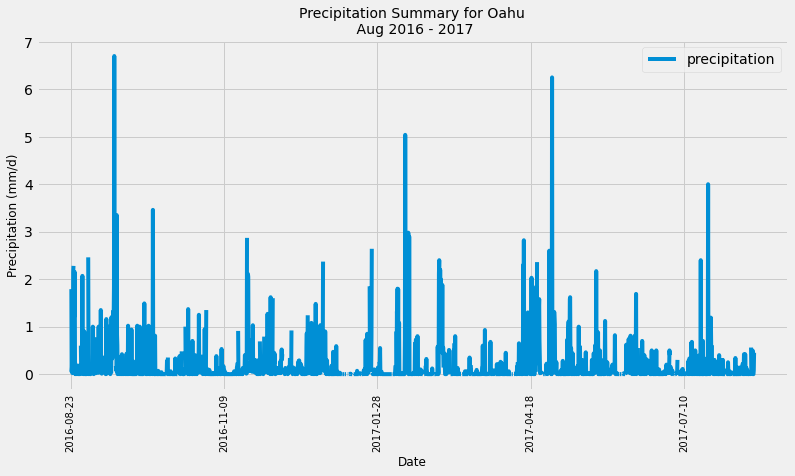

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(12, 6))
plt.xticks(fontsize= '10', rotation=90)
plt.xlabel("Date", fontsize='12')
plt.ylabel("Precipitation (mm/d)", fontsize='12')
plt.title("Precipitation Summary for Oahu\n Aug 2016 - 2017", fontsize='14')
plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [27]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature at the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [30]:
# Convert the Temperature Observation Results to a DataFrame.
temp_df = pd.DataFrame(results, columns=['tobs'])
print(temp_df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


In [31]:
# Print the temp_df without the index. 
print(temp_df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

Text(0.5, 1.0, 'Temperatures from Most Active Weather Station \n Oahu, Aug 2016-2017')

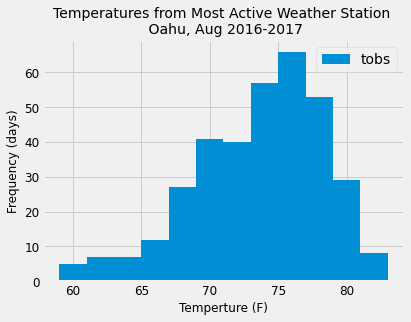

In [32]:
# Plot the temperature observations of the most recent year from the most active station as a histogram.
temp_df.plot.hist(bins=12, fontsize='12')
plt.tight_layout()
plt.xlabel("Temperture (F)", fontsize='12')
plt.ylabel("Frequency (days)",fontsize='12')
plt.title("Temperatures from Most Active Weather Station \n Oahu, Aug 2016-2017", fontsize='14')

In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
    return results

In [34]:
calc_temps('2016-08-23', '2017-08-23')

[(58.0, 74.59058295964125, 87.0)]

In [35]:
calc_temps('2016-08-23')

TypeError: calc_temps() missing 1 required positional argument: 'end'

In [ ]:
def calc_temp(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    if not end:
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()
        return results 
    
    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
    return results

In [ ]:
# use the function with start date only, 
# note the dataset ends on 2017-08-23, so if using '2016-08-23' as a start date, it will give same results as if we were 
# to specifiy a time frame ('2016-08-23', '2017-08-23'). 
calc_temp('2016-08-23')

# Challenge